In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import scipy

In [13]:
# Define paths to your dataset
data_dir = '/Users/esthersagara/Desktop/Image_Classifier/clf-data'
train_data_dir = os.path.join(data_dir, 'train')
test_data_dir = os.path.join(data_dir, 'test')

In [14]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (empty or occupied)

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation to improve model generalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [16]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2715 images belonging to 2 classes.


In [17]:
# Load test data (without augmentation)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3375 images belonging to 2 classes.


In [18]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
85/85 [==============================] - 58s 683ms/step - loss: 0.3236 - accuracy: 0.8541 - val_loss: 0.0715 - val_accuracy: 0.9828
Epoch 2/10
85/85 [==============================] - 65s 768ms/step - loss: 0.0604 - accuracy: 0.9831 - val_loss: 0.0350 - val_accuracy: 0.9837
Epoch 3/10
85/85 [==============================] - 68s 798ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0523 - val_accuracy: 0.9822
Epoch 4/10
85/85 [==============================] - 69s 805ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0332 - val_accuracy: 0.9870
Epoch 5/10
85/85 [==============================] - 69s 814ms/step - loss: 0.0254 - accuracy: 0.9901 - val_loss: 0.0272 - val_accuracy: 0.9861
Epoch 6/10
85/85 [==============================] - 78s 921ms/step - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.0075 - val_accuracy: 0.9970
Epoch 7/10
85/85 [==============================] - 72s 850ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0212 - val_accuracy: 0.9881

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

106/106 [==============================] - 14s 133ms/step - loss: 0.1460 - accuracy: 0.9393
Test accuracy: 0.9392592310905457


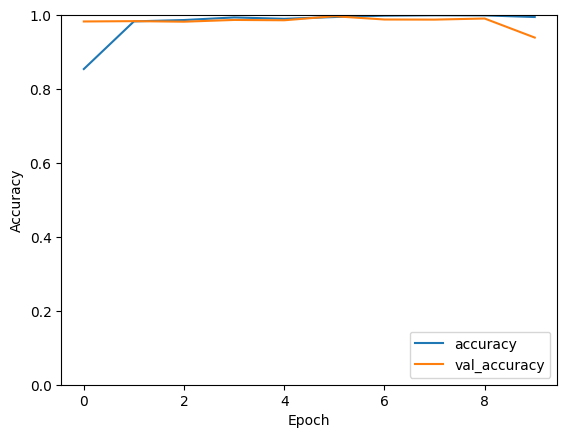

In [21]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()